# Bandit Problem

In [2]:
# imports
from bandits import Bandit
import random
# Include your imports here, if any are used.
import numpy as np 
import matplotlib.pyplot as plt

A bandit is one option (or “arm”) you can choose, where the reward you get is uncertain and must be learned by trying it out.
In multi-armed bandits, you repeatedly pick among several such uncertain options to find which one pays best.

A list of ten bandit objects initialized in the list...

In [6]:
bandits = [Bandit(random.random()*4-2) for _ in range(10)]

To generate reward from that bandit, use the pullLever() command

In [7]:
bandits[0].pullLever()

0.17111292225315

## Greedy algorithm Implementation

In [49]:
from numpy import argmax


def run_greedy():
    Avg= np.zeros(shape=10)
    Num= np.zeros(shape=10)
    Reward= np.zeros(shape=2000)
    for t in range(2000):
        ind= np.argmax(Avg)
        val= bandits[ind].pullLever()
        Num[ind]+=1
        Avg[ind]+=(val-Avg[ind])/Num[ind]
        Reward[t]=val
    return Reward
    

Plot the cumulative average of rewards as the number of iterations increases. and display that image below.

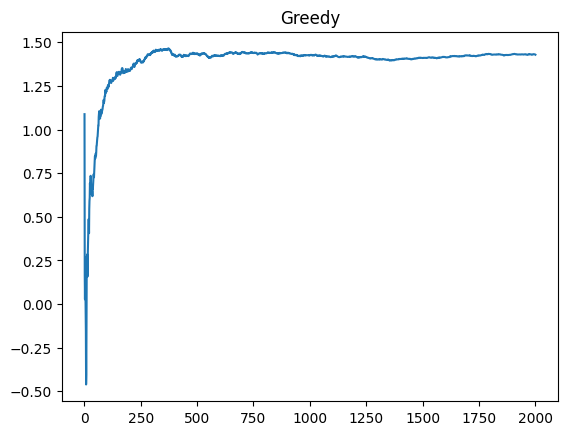

In [50]:
banditlist= run_greedy()
x= np.array(np.arange(1,2001))
y=np.zeros(2000)
for p in range(2000):
    y[p]= np.sum(banditlist[:x[p]])/x[p]
plt.plot(x,y)
plt.title("Greedy")
plt.show()

## $\epsilon$-greedy Algorithm

In [3]:
from numpy import argmax
def run_epsilon_greedy(epsilon):
    # TODO: Implement the epsilon greedy algorithm here
    # Return the reward from the bandits in a list
    rg = np.random.default_rng()
    Avg= np.zeros(shape=10)
    Num= np.zeros(shape=10)
    Reward= np.zeros(shape=1000)
    for t in range(1000):
        ind=np.argmax(Avg)
        prob=rg.random()
        if prob<epsilon:
            ran=rg.integers(0,10)
            val= bandits[ran].pullLever()
            Num[ran]+=1
            Avg[ran]+=(val-Avg[ran])/Num[ran]
            Reward[t]=val
        else:
            val= bandits[ind].pullLever()
            Num[ind]+=1
            Avg[ind]+=(val-Avg[ind])/Num[ind]
            Reward[t]=val
    return Reward
       

    

Plot the cumulative average of rewards as the number of iterations increases but for various values of $\epsilon$.

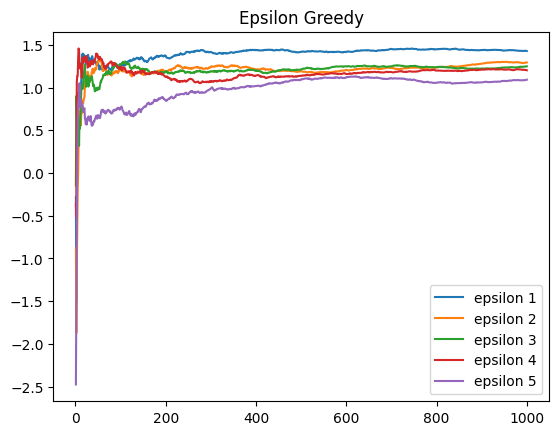

In [60]:
rg = np.random.default_rng()
epsilons= np.linspace(0,0.3,5)
x= np.array(np.arange(1,1001))
for i in range(5):
    banditlist= run_epsilon_greedy(epsilons[i])
    y=np.zeros(1000)
    for p in range(1000):
        y[p]= np.sum(banditlist[:x[p]])/x[p]
    plt.plot(x,y)
plt.legend(["epsilon 1", "epsilon 2", "epsilon 3","epsilon 4", "epsilon 5"])
plt.title("Epsilon Greedy")
plt.show()

## Finding the optimal $\epsilon$

Run the $\epsilon$-greedy algorithm for 1000 iterations and find the optimal $\epsilon$ value by plotting the cumulative average of rewards for various values of $\epsilon$

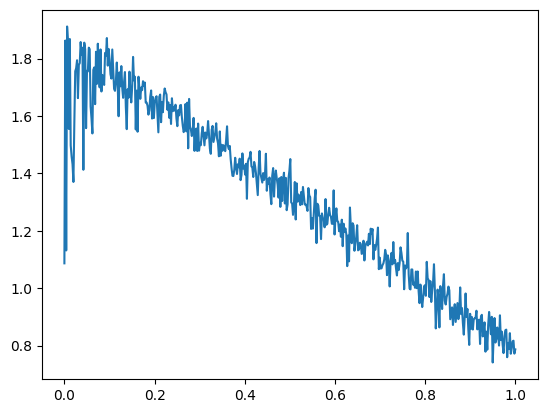

The optimal value of epsilon is: 0.0060120240480961915


In [64]:
epsilons= np.linspace(0,1,500)
y= np.zeros(500)
for t in range(500):
    y[t]=np.sum(run_epsilon_greedy(epsilons[t]))/1000
plt.plot(epsilons,y)
plt.show()
print("The optimal value of epsilon is:", epsilons[np.argmax(y)])

## Optimistic Initial Values

In [4]:
def run_optimistic_greedy():
    # TODO: Implement the optimistic greedy algorithm here
    # Return the reward from the bandits in a list
     from numpy import argmax
     Avg= np.array([10,10,10,10,10,10,10,10,10,10])
     Num= np.zeros(shape=10)
     Reward= np.zeros(shape=1000)
     for t in range(1000):
        ind= np.argmax(Avg)
        val= bandits[ind].pullLever()
        Num[ind]+=1
        Avg[ind]+=(val-Avg[ind])/Num[ind]
        Reward[t]=val
     return Reward
    

Plot the cumulative average of rewards as the number of iterations increases for an optimistic greedy of $Q_1 = 10$ and a non-optimistic $\epsilon = 0.1$ and try to compare which is better.

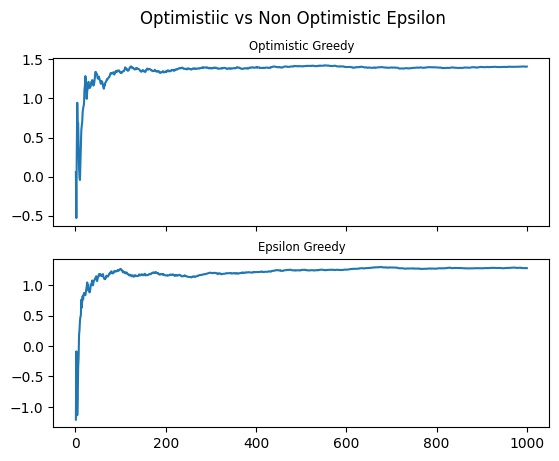

In [47]:
from numpy import true_divide


fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle("Optimistiic vs Non Optimistic Epsilon")
banditlist1= run_optimistic_greedy()
x= np.array(np.arange(1,1001))
yopt=np.zeros(1000)
for p in range(1000):
    yopt[p]= np.sum(banditlist1[:x[p]])/x[p]
banditlist2= run_epsilon_greedy(0.1)
yeps=np.zeros(1000)
for w in range(1000):
     yeps[w]= np.sum(banditlist2[:x[w]])/x[w]
ax1.plot(x,yopt)
ax1.set_title('Optimistic Greedy', fontsize='small')
ax2.plot(x,yeps)
ax2.set_title('Epsilon Greedy', fontsize='small')
plt.show()

## Upper Confidence Bound (UCB)

In [53]:
from numpy import log, sqrt


def run_ucb(c):
    # TODO: Implement the UCB algorithm here
    # Return the reward from the bandits in a list
     Avg= np.zeros(shape=10)
     Num= np.ones(shape=10)
     Reward= np.zeros(shape=1000)
     Ucbavg=np.zeros(shape=10)
     for q in range(10):
          Avg[q]= bandits[q].pullLever()
     for t in range(1000):
         for x in range(10):
              Ucbavg[x]= Avg[x]+ c*sqrt(log(10+t)/Num[x])
         ind= np.argmax(Ucbavg)
         val= bandits[ind].pullLever()
         Num[ind]+=1
         Avg[ind]+=(val-Avg[ind])/Num[ind]
         Reward[t]=val
     return Reward
    

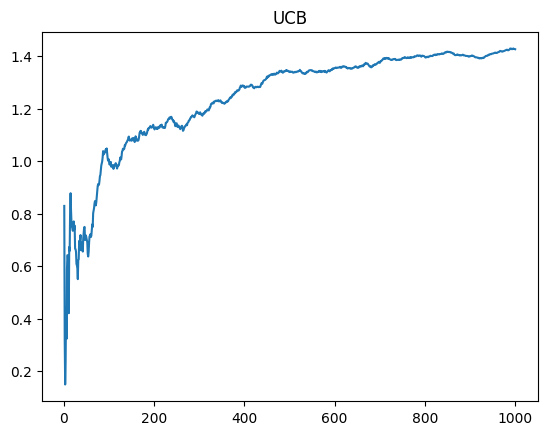

In [59]:
banditlist= run_ucb(2)
x= np.array(np.arange(1,1001))
y=np.zeros(1000)
for p in range(1000):
    y[p]= np.sum(banditlist[:x[p]])/x[p]
plt.plot(x,y)
plt.title("UCB")
plt.show()